<a href="https://colab.research.google.com/github/a2hvin/carti/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
solar_flare = fetch_ucirepo(id=89)

# data (as pandas dataframes)
X = solar_flare.data.features
y = solar_flare.data.targets

# metadata
print(solar_flare.metadata)

# variable information
print(solar_flare.variables)


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo


solar_flare = fetch_ucirepo(id=89)
X = solar_flare.data.features
y = solar_flare.data.targets

# (lowercase only)
X.columns = [col.lower() for col in X.columns]
y.columns = [col.lower() for col in y.columns]

# Replace missing or invalid values (e.g., '?' strings) with NaN
X = X.replace('?', pd.NA)
y = y.replace('?', pd.NA)

#  Remove any rows with missing values
df = pd.concat([X, y], axis=1)
df = df.dropna()

# cleaned: lowercase columns, no missing values
print(df.head())


  modified zurich class largest spot size spot distribution  activity  \
0                     C                 S                 O         1   
1                     D                 S                 O         1   
2                     C                 S                 O         1   
3                     D                 S                 O         1   
4                     D                 A                 O         1   

   evolution  previous 24 hour flare activity  historically-complex  \
0          2                                1                     1   
1          3                                1                     1   
2          3                                1                     1   
3          3                                1                     1   
4          3                                1                     1   

   became complex on this pass  area  area of largest spot  common flares  \
0                            2     1                     

In [4]:
print(df.columns)
df['moderate flares'] = pd.to_numeric(df['moderate flares'], errors='coerce')
df['severe flares'] = pd.to_numeric(df['severe flares'], errors='coerce')


df = df.dropna(subset=['moderate flares', 'severe flares'])

df['total_flares'] = df['moderate flares'] + df['severe flares']

Index(['modified zurich class', 'largest spot size', 'spot distribution',
       'activity', 'evolution', 'previous 24 hour flare activity',
       'historically-complex', 'became complex on this pass', 'area',
       'area of largest spot', 'common flares', 'moderate flares',
       'severe flares'],
      dtype='object')


/tmp/ipython-input-4248808895.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='evolution', palette='pastel')


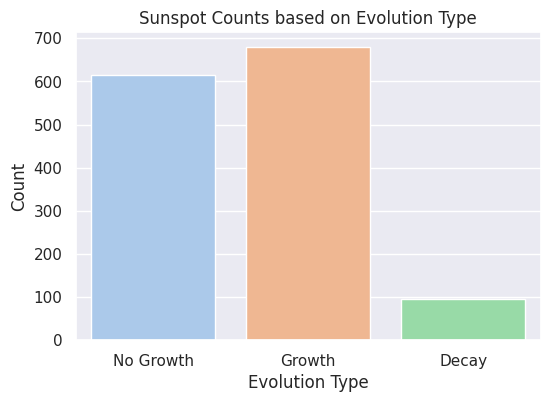

/tmp/ipython-input-4248808895.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='evolution', y='severe flares', palette='muted')


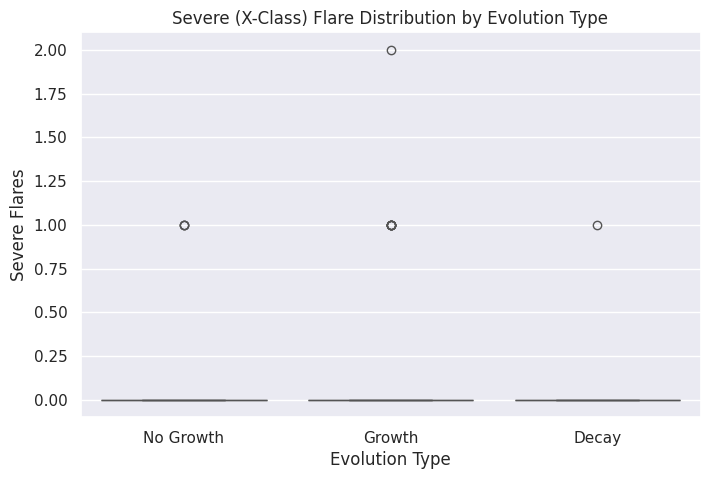

/tmp/ipython-input-4248808895.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='evolution', y='total_flares', palette='muted')


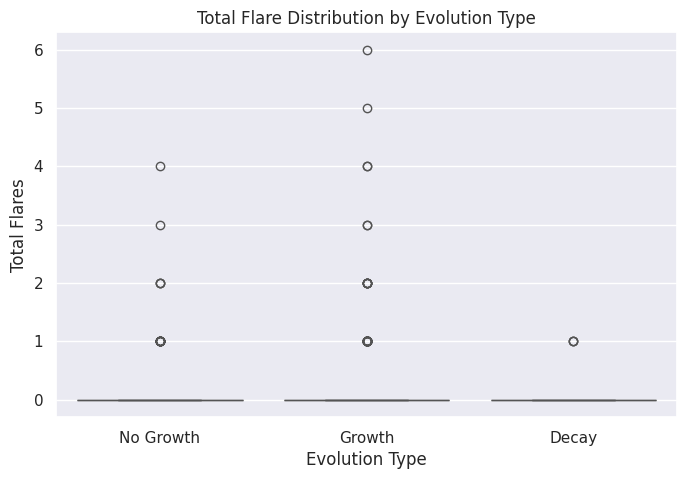

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

solar_flare = fetch_ucirepo(id=89)
X = solar_flare.data.features
y = solar_flare.data.targets

df = pd.concat([X, y], axis=1)

df.columns = [col.lower() for col in df.columns]

df = df.replace('?', pd.NA)


df['moderate flares'] = pd.to_numeric(df['moderate flares'], errors='coerce')
df['severe flares'] = pd.to_numeric(df['severe flares'], errors='coerce')


df = df.dropna(subset=['evolution', 'moderate flares', 'severe flares'])


df['total_flares'] = df['moderate flares'] + df['severe flares']



growth_map = {
    1: 'Decay',
    2: 'No Growth',
    3: 'Growth'
}
df['evolution'] = df['evolution'].astype(int).map(growth_map)

# Plot 1
sns.set()
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='evolution', palette='pastel')
plt.title('Sunspot Counts based on Evolution Type')
plt.xlabel('Evolution Type')
plt.ylabel('Count')
plt.show()

# Plot 2
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='evolution', y='severe flares', palette='muted')
plt.title('Severe (X-Class) Flare Distribution by Evolution Type')
plt.xlabel('Evolution Type')
plt.ylabel('Severe Flares')
plt.show()

# Plot 3
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='evolution', y='total_flares', palette='muted')
plt.title('Total Flare Distribution by Evolution Type')
plt.xlabel('Evolution Type')
plt.ylabel('Total Flares')
plt.show()


In [6]:
print("Null Hypothesis:")
print("The mean total flare activity is the same across all sunspot evolution types.")

print("Alternative Hypothesis:")
print("At least one sunspot evolution type has a different mean total flare activity.")




Null Hypothesis:
The mean total flare activity is the same across all sunspot evolution types.
Alternative Hypothesis:
At least one sunspot evolution type has a different mean total flare activity.


In [7]:
import pandas as pd
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo

# Get the data
solar_flare = fetch_ucirepo(id=89)
X = solar_flare.data.features
y = solar_flare.data.targets

# Combine features and targets
df = pd.concat([X, y], axis=1)

# Make flare columns numbers (in case they're strings)
df['moderate flares'] = pd.to_numeric(df['moderate flares'], errors='coerce')
df['severe flares'] = pd.to_numeric(df['severe flares'], errors='coerce')

# Remove rows with missing data in important columns
df = df.dropna(subset=['evolution', 'moderate flares', 'severe flares'])

# Add total flares column
df['total_flares'] = df['moderate flares'] + df['severe flares']

# Count how many data points per evolution type
counts = df.groupby('evolution')['total_flares'].count()
print("Data points per evolution type:")
print(counts)

# Make groups only if they have at least 2 data points
groups = []
for evolution_type in sorted(df['evolution'].unique()):
    group_data = df[df['evolution'] == evolution_type]['total_flares']
    if len(group_data) > 1:
        groups.append(group_data)

if len(groups) >= 2:
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"\nANOVA F-statistic: {f_stat:.3f}")
    print(f"p-value: {p_val:.3f}")

    if p_val < 0.05:
        print("Reject null hypothesis: There is a difference between groups.")
    else:
        print("Fail to reject null hypothesis: No difference found between groups.")
else:
    print("Not enough groups with enough data to run ANOVA.")


Data points per evolution type:
evolution
1     95
2    614
3    680
Name: total_flares, dtype: int64

ANOVA F-statistic: 4.291
p-value: 0.014
Reject null hypothesis: There is a difference between groups.


Random Forest Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.56      0.57      0.57       123
           3       0.60      0.67      0.63       136

    accuracy                           0.58       278
   macro avg       0.39      0.41      0.40       278
weighted avg       0.54      0.58      0.56       278



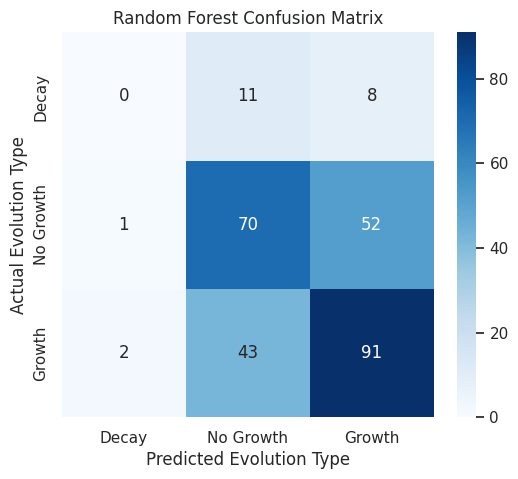

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your cleaned DataFrame

# Features and target
features = [
    'total_flares', 'severe flares', 'moderate flares', 'common flares',
    'area', 'area of largest spot', 'largest spot size',
    'modified Zurich class', 'spot distribution'
]
X = df[features]
y = df['evolution']  # Target

# Define categorical and numeric features
categorical_features = ['largest spot size', 'modified Zurich class', 'spot distribution']
numerical_features = [col for col in features if col not in categorical_features]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create pipeline with Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])
labels = ['Decay', 'No Growth', 'Growth']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Evolution Type')
plt.ylabel('Actual Evolution Type')
plt.title('Random Forest Confusion Matrix')
plt.show()


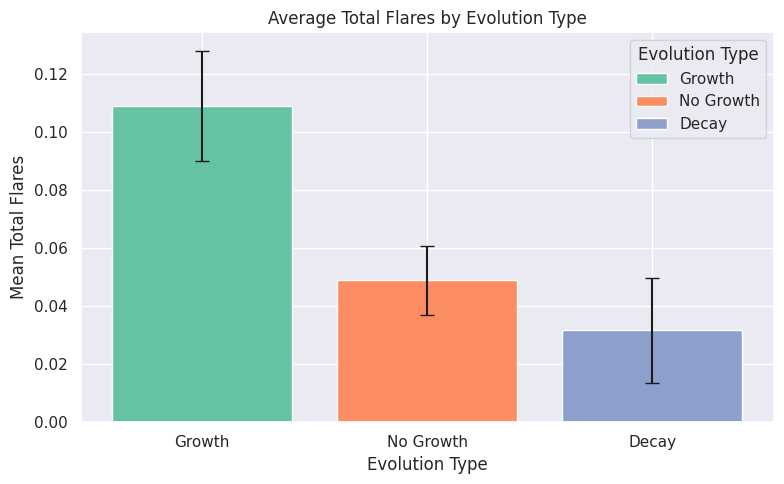

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


grouped = df.groupby('evolution')['total_flares']
means = grouped.mean()
errors = grouped.sem()

colors = {
    'Growth': '#66c2a5',
    'No Growth': '#fc8d62',
    'Decay': '#8da0cb'
}

# Apply the mapping to the 'evolution' column before accessing the means and errors
growth_map = {
    1: 'Decay',
    2: 'No Growth',
    3: 'Growth'
}
means.index = means.index.map(growth_map)
errors.index = errors.index.map(growth_map)


labels = list(colors.keys())
mean_vals = [means[label] for label in labels]
error_vals = [errors[label] for label in labels]
bar_colors = [colors[label] for label in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mean_vals, yerr=error_vals, color=bar_colors, capsize=5)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[label], label=label) for label in colors]
plt.legend(handles=legend_elements, title='Evolution Type')

plt.title('Average Total Flares by Evolution Type')
plt.ylabel('Mean Total Flares')
plt.xlabel('Evolution Type')
plt.tight_layout()
plt.show()